# MSDM5056 Tutorial 10 - Processes on Network II

## Table of content

1. Epidemic model under full mixing
2. Epidemic model on network
3. Time scale of outbreak

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.integrate import solve_ivp

---

# 1. Epidemic model under full mixing

In epidemic models, the population is divided into different classes depending on the state of the disease, such as susceptible (S), infectious (I) and recovered (R). The simplest model assumes all individuals are identical and homogeneously mixed, i.e. everybody has the same rate of being infected or getting recovered. The transmission rate simply depends on the number of infectious individuals - the more infected individuals, the higher probability of transmission. We can construct a general framework to model the numbers of individuals of different classes as a function of time. The model generaly includes the followings:

1. The total number of individuals must be a constant. Assuming the population has $N$ individuals, we can write

    \begin{align*}
    N = \sum_m N_m(t)
    \end{align*}

    where $N_m(t)$ is the number of individuals belonging to class $m$, and sum of all classes yields the total number of individuals.

2. There are mainly two kinds of processes leading to transition between two classes:
    - **Spontaneous transition** - The change only depends on the individual itself. For example, an infected person get recovered only depends on his immune system's strength. The spontaneous transition from class $i$ to $j$ can be described by the equations:
    
        \begin{align*}
        \begin{cases}
        N_i(t+\Delta t) = N_i(t) - r\Delta t\cdot N_i(t) \\
        N_j(t+\Delta t) = N_j(t) + r\Delta t\cdot N_i(t) 
        \end{cases}
        \end{align*}

        The change in number is proportional to the $N_i(t)$ only, and $r$ is the rate of transition. With some change of subjects we can rewrite them as two differential equations:
        \begin{align*}
        \begin{cases}
        \dfrac{dN_i}{dt} = - r\cdot N_i(t) \\
        \dfrac{dN_j}{dt} = r\cdot N_i(t) 
        \end{cases}\\
        \end{align*}<br> 
       
    - **Transition via interaction** - The change occur only if two individuals come close with each other. For example, a susceptible individual can become infected only if he has contacted with an infected individual. The transition from class $i$ to $j$ via contacting with individual from class $j$ can be described by:
    
        \begin{align*}
        \begin{cases}
        N_i(t+\Delta t) = N_i(t) - r\Delta t\cdot N_i(t)\cdot \dfrac{N_j(t)}{N} \\
        N_j(t+\Delta t) = N_j(t) + r\Delta t\cdot N_i(t)\cdot \dfrac{N_j(t)}{N} 
        \end{cases}
        \end{align*}
    
        The extra term $\frac{N_j(t)}{N}$ is the probability of meeting an individual from class $j$. With some change of subjects we can rewrite them as two differential equations:
        \begin{align*}
        \begin{cases}
        \dfrac{dN_i}{dt} = - r\cdot \dfrac{N_i(t)\cdot N_j(t)}{N} \\
        \dfrac{dN_j}{dt} = r\cdot \dfrac{N_i(t)\cdot N_j(t)}{N} 
        \end{cases}\\
        \end{align*}
        
In general, the transitions between classes are mixes of these two processes. The differential equation to a class $N_i(t)$ would look something like

\begin{align*}
\frac{dN_i}{dt} = \sum_j\sum_k \left[r_{j,k \to i} \cdot \frac{N_j(t)\cdot N_k(t)}{N} - r_{i,k \to j} \cdot \frac{N_i(t)\cdot N_k(t)}{N} - r_{i,j \to k} \cdot \frac{N_i(t)\cdot N_j(t)}{N}\right]+ \sum_h \left[r_{h \to i} \cdot N_h(t) - r_{i \to h} \cdot N_i(t)\right] \,.
\end{align*}

## 1.1 SI model

Every individuals are divided into 2 states: 
- Susceptible (S) 
- Infected (I)

Every susceptible individual have a probability $\beta$ to become infected after contacting an infected person, while infected people can never recover. 

Assuming there are total $N$ individuals, with $S$ of them being susceptible and $I = N-S$ of them being infected. Under homogeneous assumption, the expected number of newly infected individuals in each iteration is equal to 

\begin{align*}
\frac{\Delta I}{\Delta t} &\sim \begin{pmatrix}\text{ Prob. of } \\ \text{ infection}\end{pmatrix}\times  \begin{pmatrix}\text{ no. of susceptible } \\ \text { person }\end{pmatrix} \times \begin{pmatrix}\text{ Prob. of meeting } \\ \text{ infected person }\end{pmatrix}\\
\frac{dI}{dt} &= \beta \times S \times \frac{I}{N} 
\end{align*}

Letting $i = \frac{I}{N}$, $s = \frac{S}{N}$ and since $s + i = 1$, this can be transformed into one first order ODE

\begin{align*}
\frac{di}{dt} = \beta (1-i)i
\end{align*}

The form of this ODE is often known as the logistic growth equation, which is analytically solvable. The standard solution gives 

\begin{align*}
i(t) = \frac{i_0e^{\beta t}}{1-i_0 + i_0e^{\beta t}}
\end{align*}

where $i_0$ is the initial condition. Then $s(t)$ can also be solved by $s(t) = 1-i(t)$. We can call an ODE solver to carry out the simulation. 

In [2]:
def SI(t,i,beta):
    return i*(1-i)*beta

def logistic(t,i0,beta):
    return i0*np.exp(beta*t)/(1-i0+i0*np.exp(beta*t))

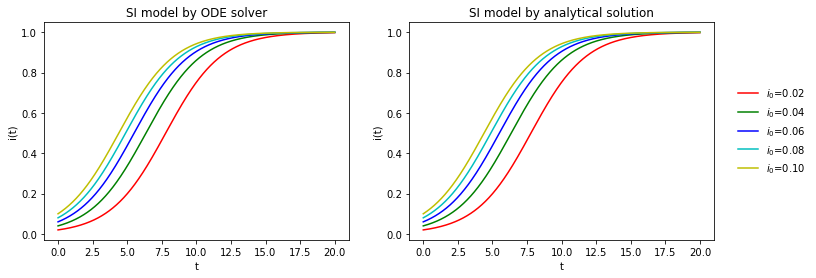

In [3]:
beta = 0.5
t_span = [0,20]
i0s = np.linspace(0.02,0.1,5)

sol = solve_ivp(SI, t_span, i0s, max_step=1e-2, args=(beta,))

fig, ax = plt.subplots(1,2, figsize=(12,4))
for i,c in zip(range(len(i0s)), ['r','g','b','c','y']):
    ax[0].plot(sol.t, sol.y[i], color=c, label='$i_0$={}'.format(i0s[i]))
    ax[1].plot(sol.t, logistic(sol.t,i0s[i],beta), color=c, label='$i_0$={:.2f}'.format(i0s[i]))

ax[0].set_title("SI model by ODE solver")
ax[1].set_title("SI model by analytical solution")
for ax in ax.flat:
    ax.set(xlabel='t', ylabel='i(t)')
plt.legend(loc='center left', bbox_to_anchor=(1.05,.5), frameon=False)
plt.show()

## 1.2 SIR model

Every individuals are divided into 3 states: 
- Susceptible (S) 
- Infected (I)
- Recovered (R)

And their transitions between states are as follow:
- Every susceptible individual have a probability $\beta$ to become infected after contacting an infected person
- Every infected individual can recover or be dead by a probability $\mu$. 

So there is an extra differential equation comparing with SI model, describing the number of newly recovered individuals:

\begin{align*}
\frac{\Delta R}{\Delta t} &\sim \begin{pmatrix}\text{ Prob. of } \\ \text{ recovery }\end{pmatrix}\times  \begin{pmatrix}\text{ no. of infected } \\ \text { person }\end{pmatrix} \\
\frac{dR}{dt} &= \mu \times I  
\end{align*}

Letting $i = \frac{I}{N}$, $s = \frac{S}{N}$ and $r = \frac{R}{N}$, we come to a system of three ODEs. The system cannot be analytically solved.

\begin{align*}
\begin{cases}
\dfrac{ds}{dt} &= -\beta s i \\
\dfrac{di}{dt} &= \beta s i - \mu i \\
\dfrac{dr}{dt} &= \mu i
\end{cases}
\end{align*}

In [4]:
# define y = [s,i,r]
def SIR(t,y,beta,mu):
     return [-beta*y[0]*y[1], beta*y[0]*y[1]-mu*y[1], mu*y[1]]

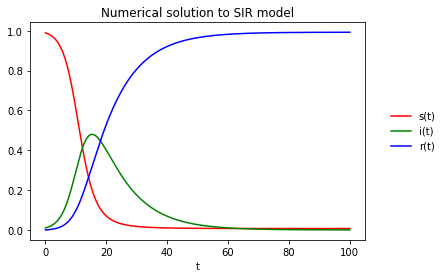

In [5]:
beta = 0.5
mu = 0.1
t_span = [0,100]
y0 = [0.99, 0.01, 0]

sol = solve_ivp(SIR, t_span, y0, max_step=1e-2, args=(beta,mu))

plt.figure(figsize=(6,4))
plt.plot(sol.t,sol.y[0], 'r', label='s(t)')
plt.plot(sol.t,sol.y[1], 'g', label='i(t)')
plt.plot(sol.t,sol.y[2], 'b', label='r(t)')
plt.title(r'Numerical solution to SIR model')
plt.xlabel('t')
plt.legend(loc='center left', bbox_to_anchor=(1.05,.5), frameon=False)
plt.show()


SIR model is interesting in the way that a phrase transition can occurs depending on the two parameters $\beta$ and $\mu$. By eliminating $i$ in the $\frac{ds}{dt}$ and $\frac{dr}{dt}$ equations, we can get a differential relation,

\begin{align*}
-\frac{1}{\beta s}\frac{ds}{dt} &= \frac{1}{\mu}\frac{dr}{dt} \\
s(t) &= s(0) e^{-\frac{\beta}{\mu}r(t)}
\end{align*}

while we also have $i(t) = 1 - s(t) - r(t)$, substitute this together with the relation above into the $\frac{dr}{dt}$ equation, we arrive a transcedental equation of $r(t)$.

\begin{align*}
\frac{dr}{dt} = \mu\left(1-r(t) - s(0)e^{-\frac{\beta}{\mu}r(t)} \right)
\end{align*}

Assuming the system will eventually arrive at an equilibrium state, i.e. $\frac{dr}{dt} = 0$. The equilibrium state $r_\infty$ is the solution to the equation

\begin{align*}
r_\infty = 1 - s(0)e^{-\frac{\beta}{\mu}r_\infty}
\end{align*}

This equation has the same form as the size of giant component in ER network under percolation (See tutorial 6, section 2.2). Using the same graphical method, one can identify two regiemes:

- Non-epidemic regime - When $\frac{\beta}{\gamma} < 1$, only the trivial solution $r_\infty = 0$ exists .
- Epidemic regime - When $\frac{\beta}{\gamma} > 1$, a non-trivial solution emerges.

The factor $R=\frac{\beta}{\gamma}$ is called the basic reproduction number. The explanation to this result is simple - the non-epidemic regime corresponds to that the epidemic never occurs, since the recover rate is higher than the infection rate. The epidemic regime corresponds to that a portion of individuals have been infected and recovered, while the remainings have never been infected.

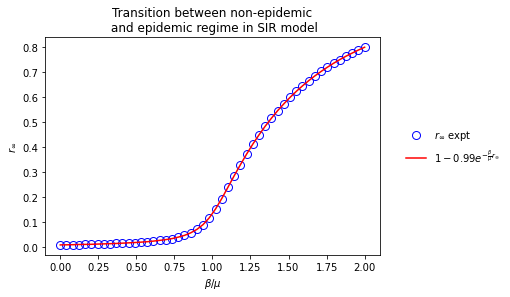

In [6]:
betas = np.linspace(0,1)
mu = 0.5
t_span = [0,100]
y0 = [0.99, 0.01, 0]

rs_expt = np.zeros(len(betas))
for i, beta in enumerate(betas):
    sol = solve_ivp(SIR, t_span, y0, max_step=1e-1, args=(beta,mu))
    rs_expt[i] = np.mean(sol.y[2,-10:])
                
def solve_r_with(beta, mu, y0):
    rs = np.linspace(0,1)
    argmin = np.argmin(np.abs(1-y0*np.exp(-beta/mu*rs)-rs)[1:])+1
    rs = np.linspace(rs[argmin-1],rs[argmin+1],100)
    return rs[np.argmin(np.abs(1-y0*np.exp(-beta/mu*rs)-rs))]

rs_theory = np.array([solve_r_with(beta, mu, y0[0]) for beta in betas])

plt.figure(figsize=(6,4))
plt.plot(betas/mu, rs_expt, 'bo', mfc='none', ms=8, label=r'$r_\infty$ expt')
plt.plot(betas/mu, rs_theory, 'r-', label=r'$1-0.99e^{-\frac{\beta}{\mu} r_\infty}$')
plt.title('Transition between non-epidemic\n and epidemic regime in SIR model')
plt.xlabel(r'$\beta/\mu$')
plt.ylabel('$r_\infty$')
plt.legend(loc='center left', bbox_to_anchor=(1.05,.5), frameon=False)
plt.show()

## 1.3 SIS model

In SIR model, every individuals are divided into 3 states: 
- Susceptible (S) 
- Infected (I)

The transition between states are as follow:
- Every susceptible individual have a probability $\beta$ to become infected after contacting an infected person
- Every infected individual can recover, becoming susceptible again by a probability $\mu$. 

The system can be described by the system of two ODEs. 

\begin{align*}
\begin{cases}
\dfrac{ds}{dt} &= -\beta s i + \mu i\\
\dfrac{di}{dt} &= \beta s i - \mu i \\
\end{cases}
\end{align*}

The system can be analytically solved, result in a logistic like solution. 

\begin{align*}
i(t) = \frac{(\beta-\mu)Ce^{(\beta-\mu)t}}{1+\beta Ce^{(\beta-\mu)t}}
\end{align*}

with $C=\frac{i(0)}{\beta-\mu-\beta i(0)} \approx \frac{i(0)}{\beta-\mu}$ when $i(0) \approx 0$. 

In [7]:
# define y = [s,i]
def SIS(t,y,beta,mu):
     return [mu*y[1]-beta*y[0]*y[1], beta*y[0]*y[1]-mu*y[1]]
    
def logistic_SIS(t,i0,beta,mu):
    C = i0/(beta-mu-beta*i0)
    return (beta-mu)*C*np.exp((beta-mu)*t)/(1+beta*C*np.exp((beta-mu)*t))

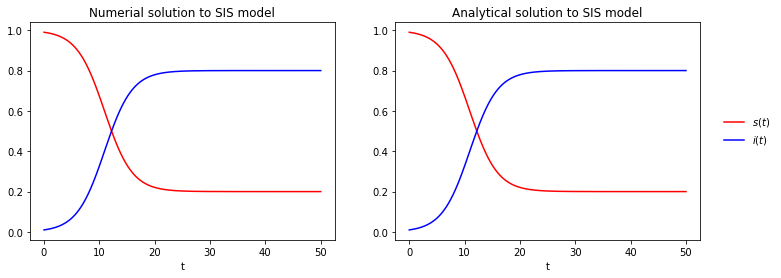

In [8]:
beta = 0.5
mu = 0.1
t_span = [0,50]
y0 = [0.99, 0.01]

sol = solve_ivp(SIS, t_span, y0, max_step=1e-2, args=(beta,mu))

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(sol.t,sol.y[0], 'r', label=r'$s(t)$')
ax[0].plot(sol.t,sol.y[1], 'b', label=r'$i(t)$')
ax[0].set_title('Numerial solution to SIS model')

ax[1].plot(sol.t,1-logistic_SIS(sol.t,y0[1],beta,mu), 'r', label=r'$s(t)$')
ax[1].plot(sol.t,logistic_SIS(sol.t,y0[1],beta,mu), 'b', label=r'$i(t)$')
ax[1].set_title('Analytical solution to SIS model')

for ax in ax.flat:
    ax.set(xlabel='t')
plt.legend(loc='center left', bbox_to_anchor=(1.05,.5), frameon=False)
plt.show()

The SIS model also exhibits phrase transition behavior similar to SIR model that is determined by the parameter $R=\frac{\beta}{\mu}$:

- Non-epidemic regime - When $\frac{\beta}{\gamma} < 1$, $i(t)$ exhibits an exponential decay.
- Epidemic regime - When $\frac{\beta}{\gamma} > 1$, $i(t)$ is approximately a logistic growth, up to the value $1-\frac{1}{R} = 1-\frac{\mu}{\beta}$. 

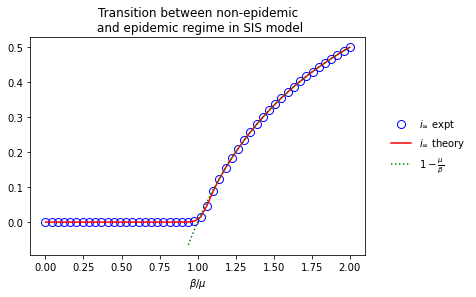

In [9]:
betas = np.linspace(0,1)
mu = 0.5
t_span = [0,100]
y0 = [0.99, 0.01]

is_expt = np.zeros(len(betas))
for i, beta in enumerate(betas):
    sol = solve_ivp(SIS, t_span, y0, max_step=1e-1, args=(beta,mu))
    is_expt[i] = np.mean(sol.y[1,-10:])
                

is_theory = np.array([np.mean(logistic_SIS(sol.t,y0[1],beta,mu)[-10:]) for beta in betas])


plt.figure(figsize=(6,4))
plt.plot(betas/mu, is_expt, 'bo', mfc='none', ms=8, label=r'$i_\infty$ expt')
plt.plot(betas/mu, is_theory, 'r-', label=r'$i_\infty$ theory')
plt.plot(betas[betas>0.9*mu]/mu, 1-mu/betas[betas>0.9*mu], 'g:', label=r'$1-\frac{\mu}{\beta}$')
plt.title('Transition between non-epidemic\n and epidemic regime in SIS model')
plt.xlabel(r'$\beta/\mu$')
plt.legend(loc='center left', bbox_to_anchor=(1.05,.5), frameon=False)
plt.show()

## 1.4 SIRS model

In SIRS model, every individuals are divided into 3 states: 
- Susceptible (S) 
- Infected (I)
- Recovered (R)

The transition between states are as follow:
- Every susceptible individual have a probability $\beta$ to become infected after contacting an infected person
- Every infected individual can recover by a probability $\mu$. 
- Every recovered individual can lose his immunity and become susceptible, by a probability $\delta$. 

The system of ODEs in SIRS model, however, cannot be solved analytically. 

\begin{align*}
\begin{cases}
\dfrac{ds}{dt} &= -\beta s i + \delta r\\
\dfrac{di}{dt} &= \beta s i - \mu i \\
\dfrac{dr}{dt} &= \mu i - \delta r
\end{cases}
\end{align*}

In [10]:
# define y = [s,i,r]
def SIRS(t,y,beta, mu, delta):
     return [delta*y[2]-beta*y[0]*y[1], beta*y[0]*y[1]-mu*y[1], mu*y[1]-delta*y[2]]

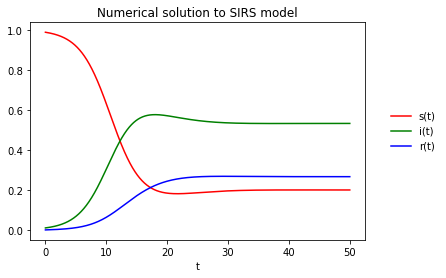

In [11]:
beta = 0.5
mu = 0.1
delta = 0.2
t_span = [0,50]
y0 = [0.99, 0.01, 0]

sol = solve_ivp(SIRS, t_span, y0, max_step=1e-2, args=(beta,mu,delta))

plt.figure(figsize=(6,4))
plt.plot(sol.t,sol.y[0], 'r', label='s(t)')
plt.plot(sol.t,sol.y[1], 'g', label='i(t)')
plt.plot(sol.t,sol.y[2], 'b', label='r(t)')
plt.title('Numerical solution to SIRS model')
plt.xlabel('t')
plt.legend(loc='center left', bbox_to_anchor=(1.05,.5), frameon=False)
plt.show()

---

# 2. Epidemic models on network

The main difference in modeling epidemic models on network is that in the transition via interaction, the transition of a node from class $i$ to $j$ now depends on whether it has neighbours that belong to class $j$. So we have to include the adjacency matrix in the terms about infection, which writes as

\begin{align*}
\dfrac{di_i}{dt} &=\ \beta s_i\sum_j A_{ij} i_j
\end{align*}

This differential equation will give non-integral values to $i_i(t)$. If we want the nodes to have discrete status, i.e. $i_i= 0 \text{ or }1$, we can make the follow adpatation:

\begin{align*}
\left\{\begin{array}{rl}
\dfrac{di_i}{dt} &=\  p \  s_i \  \text{sgn}\left(\sum_j A_{ij} i_j\right) \\
p &=\ \mathbf{1}_\beta
\end{array}\right.
\end{align*}

where $\text{sgn}(x)$ is the sign function, giving $1$ if $x>0$ and 0 if $x=0$ (we can ignore the $x<0$ case). $p$ is a random variable generated from the Bernoulli distribution $\mathbf{1}_\beta$, which gives $1$ with probability $\beta$ and $0$ with probability $1-\beta$. So the above equation tells the rate of a susceptible node becoming infected with probability $\beta$ whenever it has one or more infected neighbour. 

In [12]:
er = nx.fast_gnp_random_graph
ba = nx.barabasi_albert_graph

## 2.1 SI model

With the adjacency matrix inserted, the SI model can be simulated in similar fashion, except that the input is not a single $i$, but an array of $i_i$ for all nodes. Using the relation $s_i = 1 - i_i$ for all nodes, we arrive at the system of ODEs

\begin{align*}
\dfrac{di_i}{dt} &=\ \beta (1-i_i)\sum_j A_{ij} i_j 
\end{align*}

or by discrete status:

\begin{align*}
\dfrac{di_i}{dt} &=\  \mathbf{1}_\beta \ (1-i_i) \ \text{sgn}\left(\sum_j A_{ij} i_j\right)
\end{align*}

In [13]:
# y = [i_1, i_2, ..., i_N]

def SI_cont(t,y,beta,A): 
    return (1-y)*beta*(y@A)

def SI_disc(t,y,beta,A): # y must be declared as int
    return (1-y)*np.random.binomial(1,beta,len(y))*np.sign(y@A)

# solve_ivp() only accept 1 dim input
# so the order of matrix multiplication need to be reversed

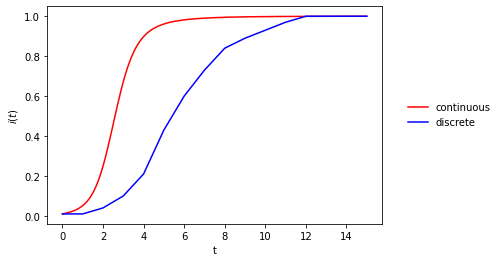

In [14]:
np.random.seed(5056)

N = 100
beta = 0.5
k_avg = 4
t_span = [0,15]

# Randomly choose an initially infected node
y0 = np.zeros(N).astype(int)
y0[np.random.randint(0,N)] = 1

# Generate graph
g = er(N, k_avg/(N-1), 5056)
A = nx.to_numpy_array(g).astype(int)

# By ODE solver
sol = solve_ivp(SI_cont, t_span, y0, max_step=1e-1, args=(beta,A))

# By discrete update
sol_disc = np.zeros(t_span[-1]+1)
y = np.zeros(N).astype(int)
y[:] = y0
sol_disc[0] = sum(y)
for t in range(1,t_span[-1]+1):
    y += SI_disc(t,y,beta,A)
    sol_disc[t] += sum(y)

# Plotting
plt.figure()
plt.plot(sol.t,sum(sol.y)/N, 'r', label='continuous')
plt.plot(range(t_span[1]+1),sol_disc/N, 'b', label='discrete')
plt.xlabel('t')
plt.ylabel(r'$i(t)$')
plt.legend(loc='center left', bbox_to_anchor=(1.05,.5), frameon=False)
plt.show()

## 2.2 SIR model

By continuous status: 

\begin{align*}
\begin{cases}
\dfrac{ds_i}{dt} &=\ -\beta s_i\sum_j A_{ij} i_j  \\
\dfrac{di_i}{dt} &=\ \beta s_i\sum_j A_{ij} i_j  - \mu i_i \\
\dfrac{dr_i}{dt} &=\ \mu i_i
\end{cases}
\end{align*}

By discrete status:

\begin{align*}
\left\{\begin{array}{rl}
\dfrac{di_s}{dt} &=\  -p_\beta \ s_i \ \text{sgn}\left(\sum_j A_{ij} i_j\right) \\
\dfrac{di_i}{dt} &=\  p_\beta \ s_i \ \text{sgn}\left(\sum_j A_{ij} i_j\right) - p_\mu  i_i\\
\dfrac{di_i}{dt} &=\  p_\mu \cdot i_i\\
p_\beta &=\ \mathbf{1}_\beta \\
p_\mu &=\ \mathbf{1}_\mu
\end{array}\right.
\end{align*}

In [15]:
# y = [s_1, s_2, ..., s_N, i_1, i_2, ..., i_N, r_1, r_2, ..., r_N]

def SIR_cont(t,y,beta,mu,A): 
    s = y[0:N]
    i = y[N:2*N]
    y1 = -s*beta*(i@A)
    y2 = s*beta*(i@A) - mu*i
    y3 = mu*i
    return np.concatenate((y1,y2,y3),None)

def SIR_disc(t,y,beta,mu,A): # y must be declared as int
    s = y[0:N]
    i = y[N:2*N]
    beta = np.random.binomial(1,beta,len(i))
    mu = np.random.binomial(1,mu,len(i))
    y1 = -s*beta*np.sign(i@A)
    y2 = s*beta*np.sign(i@A) - mu*i
    y3 = mu*i
    return np.concatenate((y1,y2,y3),None)

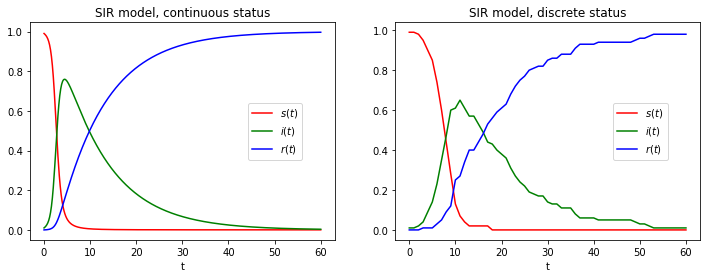

In [16]:
np.random.seed(5056)

N = 100
beta = 0.5
mu = 0.1
k_avg = 4
t_span = [0,60]

# Randomly choose an initially infected node
y0 = np.zeros(3*N).astype(int)
y0[0:N] = 1
i = np.random.randint(N)
y0[i] = 0
y0[N+i] = 1

# Generate graph
g = er(N, k_avg/(N-1), 5056)
A = nx.to_numpy_array(g).astype(int)

# By ODE solver
sol = solve_ivp(SIR_cont, t_span, y0, max_step=1e-1, args=(beta,mu,A))

# By discrete update
sol_disc = np.zeros((t_span[-1]+1,3))
y = np.zeros(3*N).astype(int)
y[:] = y0
sol_disc[0,:] = sum(y[0:N]), sum(y[N+1:2*N]), sum(y[2*N+1:3*N])
for t in range(1,t_span[-1]+1):
    y += SIR_disc(t,y,beta,mu,A)
    sol_disc[t,:] += sum(y[0:N]), sum(y[N+1:2*N]), sum(y[2*N+1:3*N])

# Plotting    
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(sol.t,sum(sol.y[0:N])/N, 'r', label=r'$s(t)$')
ax[0].plot(sol.t,sum(sol.y[N:2*N])/N, 'g', label=r'$i(t)$')
ax[0].plot(sol.t,sum(sol.y[2*N:3*N])/N, 'b', label=r'$r(t)$')
ax[0].set_title('SIR model, continuous status')

ax[1].plot(range(t_span[1]+1),sol_disc[:,0]/N, 'r', label=r'$s(t)$')
ax[1].plot(range(t_span[1]+1),sol_disc[:,1]/N, 'g', label=r'$i(t)$')
ax[1].plot(range(t_span[1]+1),sol_disc[:,2]/N, 'b', label=r'$r(t)$')
ax[1].set_title('SIR model, discrete status')

for axs in ax:
    axs.set_xlabel('t')
    axs.legend(loc='center left', bbox_to_anchor=(0.7,.5))
plt.show()

## 2.3 SIS model

By continuous status: 

\begin{align*}
\begin{cases}
\dfrac{ds_i}{dt} &=\ -\beta s_i\sum_j A_{ij} i_j + \mu i_i \\
\dfrac{di_i}{dt} &=\ \beta s_i\sum_j A_{ij} i_j  - \mu i_i 
\end{cases}
\end{align*}

By discrete status:

\begin{align*}
\left\{\begin{array}{rl}
\dfrac{di_s}{dt} &=\  -p_\beta \ s_i \ \text{sgn}\left(\sum_j  A_{ij} i_j\right) + p_\mu i_i\\
\dfrac{di_i}{dt} &=\  p_\beta \ s_i \ \text{sgn}\left(\sum_j  A_{ij} i_j\right) - p_\mu i_i\\
p_\beta &=\ \mathbf{1}_\beta \\
p_\mu &=\ \mathbf{1}_\mu
\end{array}\right.
\end{align*}

In [17]:
# y = [s_1, s_2, ..., s_N, i_1, i_2, ..., i_N]

def SIS_cont(t,y,beta,mu,A): 
    s = y[0:N]
    i = y[N:2*N]
    y1 = -s*beta*(i@A) + mu*i
    y2 = s*beta*(i@A) - mu*i
    return np.concatenate((y1,y2),None)

def SIS_disc(t,y,beta,mu,A): # y must be declared as int
    s = y[0:N]
    i = y[N:2*N]
    beta = np.random.binomial(1,beta,len(i))
    mu = np.random.binomial(1,mu,len(i))
    y1 = -s*beta*np.sign(i@A) + mu*i
    y2 = s*beta*np.sign(i@A) - mu*i
    return np.concatenate((y1,y2),None)

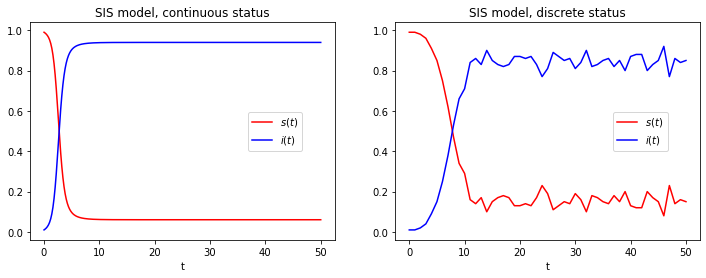

In [18]:
np.random.seed(5056)

N = 100
beta = 0.5
mu = 0.1
k_avg = 4
t_span = [0,50]

# Randomly choose an initially infected node
y0 = np.zeros(2*N).astype(int)
y0[0:N] = 1
i = np.random.randint(N)
y0[i] = 0
y0[N+i] = 1

# Generate graph
g = er(N, k_avg/(N-1), 5056)
A = nx.to_numpy_array(g).astype(int)

# By ODE solver
sol = solve_ivp(SIS_cont, t_span, y0, max_step=1e-1, args=(beta,mu,A))

# By discrete update
sol_disc = np.zeros((t_span[-1]+1,2))
y = np.zeros(2*N).astype(int)
y[:] = y0
sol_disc[0,:] = sum(y[0:N]), sum(y[N:2*N])
for t in range(1,t_span[-1]+1):
    y += SIS_disc(t,y,beta,mu,A)
    sol_disc[t,:] += sum(y[0:N]), sum(y[N:2*N])

# Plotting    
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(sol.t,sum(sol.y[0:N])/N, 'r', label=r'$s(t)$')
ax[0].plot(sol.t,sum(sol.y[N:2*N])/N, 'b', label=r'$i(t)$')
ax[0].set_title('SIS model, continuous status')

ax[1].plot(range(t_span[1]+1),sol_disc[:,0]/N, 'r', label=r'$s(t)$')
ax[1].plot(range(t_span[1]+1),sol_disc[:,1]/N, 'b', label=r'$i(t)$')
ax[1].set_title('SIS model, discrete status')

for axs in ax:
    axs.set_xlabel('t')
    axs.legend(loc='center left', bbox_to_anchor=(0.7,.5))
plt.show()

## 2.4 SIRS model

By continuous status: 

\begin{align*}
\begin{cases}
\dfrac{ds_i}{dt} &=\ -\beta s_i\sum_j A_{ij} i_j  + \delta r_i\\
\dfrac{di_i}{dt} &=\ \beta s_i\sum_j A_{ij} i_j  - \mu i_i \\
\dfrac{dr_i}{dt} &=\ \mu i_i - \delta r_i
\end{cases}
\end{align*}

By discrete status:

\begin{align*}
\left\{\begin{array}{rl}
\dfrac{di_s}{dt} &=\  -p_\beta \ s_i \ \text{sgn}\left(\sum_j A_{ij} i_j\right) + p_\delta r_i\\
\dfrac{di_i}{dt} &=\  p_\beta \ s_i \ \text{sgn}\left(\sum_j A_{ij} i_j\right) - p_\mu i_i\\
\dfrac{di_i}{dt} &=\  p_\mu i_i - p_\delta r_i\\
p_\beta &=\ \mathbf{1}_\beta \\
p_\mu &=\ \mathbf{1}_\mu \\
p_\delta &=\ \mathbf{1}_\delta 
\end{array}\right.
\end{align*}

In [19]:
# y = [s_1, s_2, ..., s_N, i_1, i_2, ..., i_N, r_1, r_2, ..., r_N]

def SIRS_cont(t,y,beta,mu,delta,A): 
    s = y[0:N]
    i = y[N:2*N]
    r = y[2*N:3*N]
    y1 = -s*beta*(i@A) + delta*r
    y2 = s*beta*(i@A) - mu*i
    y3 = mu*i - delta*r
    return np.concatenate((y1,y2,y3),None)

def SIRS_disc(t,y,beta,mu,delta,A): # y must be declared as int
    s = y[0:N]
    i = y[N:2*N]
    r = y[2*N:3*N]
    beta = np.random.binomial(1,beta,len(i))
    mu = np.random.binomial(1,mu,len(i))
    delta = np.random.binomial(1,delta,len(i))
    y1 = -s*beta*np.sign(i@A) + delta*r
    y2 = s*beta*np.sign(i@A) - mu*i
    y3 = mu*i - delta*r
    return np.concatenate((y1,y2,y3),None)

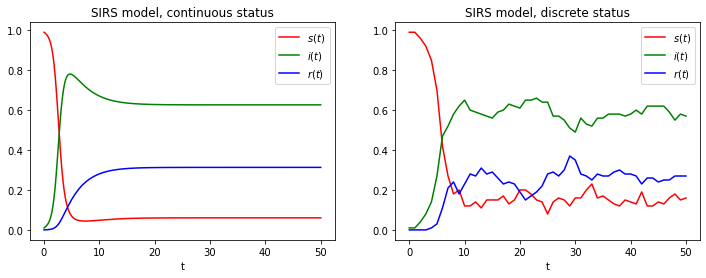

In [20]:
np.random.seed(5056)

N = 100
beta = 0.5
mu = 0.1
delta = 0.2
k_avg = 4
t_span = [0,50]

# Randomly choose an initially infected node
y0 = np.zeros(3*N).astype(int)
y0[0:N] = 1
i = np.random.randint(N)
y0[i] = 0
y0[N+i] = 1

# Generate graph
g = er(N, k_avg/(N-1), 5056)
A = nx.to_numpy_array(g).astype(int)

# By ODE solver
sol = solve_ivp(SIRS_cont, t_span, y0, max_step=1e-1, args=(beta,mu,delta,A))

# By discrete update
sol_disc = np.zeros((t_span[-1]+1,3))
y = np.zeros(3*N).astype(int)
y[:] = y0
sol_disc[0,:] = sum(y[0:N]), sum(y[N:2*N]), sum(y[2*N:3*N])
for t in range(1,t_span[-1]+1):
    y += SIRS_disc(t,y,beta,mu,delta,A)
    sol_disc[t,:] += sum(y[0:N]), sum(y[N:2*N]), sum(y[2*N:3*N])

# Plotting    
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(sol.t,sum(sol.y[0:N])/N, 'r', label=r'$s(t)$')
ax[0].plot(sol.t,sum(sol.y[N:2*N])/N, 'g', label=r'$i(t)$')
ax[0].plot(sol.t,sum(sol.y[2*N:3*N])/N, 'b', label=r'$r(t)$')
ax[0].set_title('SIRS model, continuous status')

ax[1].plot(range(t_span[1]+1),sol_disc[:,0]/N, 'r', label=r'$s(t)$')
ax[1].plot(range(t_span[1]+1),sol_disc[:,1]/N, 'g', label=r'$i(t)$')
ax[1].plot(range(t_span[1]+1),sol_disc[:,2]/N, 'b', label=r'$r(t)$')
ax[1].set_title('SIRS model, discrete status')

for axs in ax:
    axs.set_xlabel('t')
    axs.legend(loc='upper right')
plt.show()

---
# 3. Time scale of outbreak

Theoretically, we can also use configuration model to approximate the epidemic on a network. We can define the probability of having an infected neighbour, $\Theta(t)$, as

\begin{align*}
\begin{pmatrix} \text{ Prob. of having an } \\ \text{ infected neighbour but } \\ \text{ not passed by yourself }\end{pmatrix} &= \sum_{\text{all }k} \begin{pmatrix} \text{ Prob. of neighbour } \\ \text{ being degree } k\end{pmatrix} \times \begin{pmatrix} \text{Prob. of not being } \\ \text{ the source } \end{pmatrix} \times \begin{pmatrix} \text{ Prob. of a node being } \\ \text{ degree }k\text{ & infected} \end{pmatrix} \\[1ex]
\Theta(t) &= \sum_k Q(k-1)\cdot \frac{k-1}{k}\cdot i_k(t) \\[1ex]
&= \sum_k \frac{kP(k)}{\langle k\rangle}\cdot \frac{k-1}{k} \cdot i_k(t)
\end{align*}

Recalling that $Q(k) = \frac{(k+1)P(k+1)}{\langle k\rangle}$ is the excess degree distribution, i.e. probability of your neighbour being degree $k+1$. On the other hand, $i_k(t)$ is related to $\Theta(t)$ by

\begin{align*}
\frac{\Delta I}{\Delta t} &\sim \begin{pmatrix}\text{ Prob. of } \\ \text{ infection}\end{pmatrix}\times  \begin{pmatrix}\text{ Prob. of node being } \\ \text { degree }k\text{ & susceptible }\end{pmatrix} \times \begin{pmatrix} \text{ Prob. of having an } \\ \text{ infected neighbour but } \\ \text{ not passed by yourself }\end{pmatrix} \times \left( k\text{ neighbour}\right)\\
\frac{di_k(t)}{dt} &= \beta \cdot s_k(t) \cdot \Theta(t) \cdot k
\end{align*}

So we arrive at a system of ODEs of all $i_k(t)$ together with $\Theta(t)$. Then we can find the total portion of infected nodes by 

\begin{align*}
i(t) = \sum_k i_k(t)P(k)
\end{align*}



## 3.1. SI model

By substitute $s_k(t) = 1-i_k(t)$, we get the system for SI model on network. 

\begin{align*}
\left\{\begin{array}{rl}
\dfrac{di_k(t)}{dt} &=\  \beta k (1-i_k(t))\Theta(t) \\[1ex]
\Theta(t) &=\ \sum_k \dfrac{(k-1)P(k)}{\langle k\rangle}i_k(t)
\end{array}\right.
\end{align*}

For the uniform initial condition $i_k(0) = i(0) \approx 0$, the solution at the initial phase of the epidemic (i.e. $t\approx 0$) can be deduced approximately as

\begin{align*}
i_k(t) \approx i_0\left[1+ \frac{k(\langle k \rangle-1)}{\langle k^2 \rangle - \langle k \rangle} (e^{t/\tau}-1) \right]
\end{align*}

and so

\begin{align*}
i(t) = \sum_k i_k(t)P(k) \approx i_0\left[1+ \frac{\langle k \rangle^2-\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle} (e^{t/\tau}-1) \right]
\end{align*}

with $\tau = \frac{1}{\beta}\frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$ which marks the time scale of the outbreak. We have already encountered a similar term, the critical occupation probability $\phi_c = \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$ in site percolation theory.

- ER network: $\tau = \frac{1}{\beta\langle k\rangle}$. So higher mean degree gives faster outbreak.
- Scale free network: $\tau \to 0$ since $\langle k^2 \rangle \to \infty$. Outbreak on a large scale free network is explosive.



In [21]:
def outbreak_approx(t, g, tau, i0):
    deg = np.asarray([d[1] for d in g.degree])
    k1 = np.mean(deg)
    k2 = np.mean(deg**2)
    tau = k1/(k2-k1)/beta
    return  i0*(1+(k1**2-k1)/(k2-k1)*(np.exp(t/tau)-1))

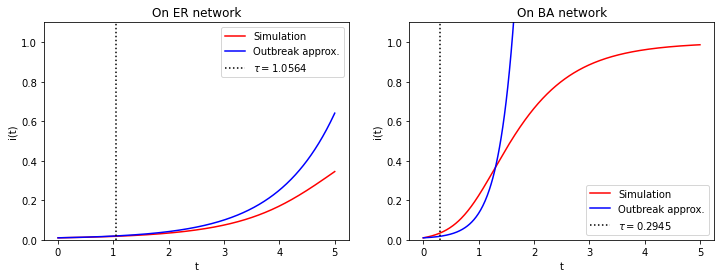

In [22]:
np.random.seed(5056)

N = 100
beta = 0.5
k_avg = 2
m = 2
t_span = [0,5]

# Randomly choose an initially infected node
y0 = np.zeros(N).astype(int)
y0[np.random.randint(0,N)] = 1

# Generate graph
ER = er(N, k_avg/(N-1), 5056)
BA = ba(N, m, 5056)
G = [ER, BA]

fig, ax = plt.subplots(1,2, figsize=(12,4))

for i, g in enumerate(G):
    A = nx.to_numpy_array(g).astype(int)
    sol = solve_ivp(SI_cont, t_span, y0, max_step=1e-2, args=(beta,A))

    # calculate time scale
    deg = np.asarray([d[1] for d in g.degree])
    k1 = np.mean(deg)
    k2 = np.mean(deg**2)
    tau = k1/(k2-k1)/beta

    ax[i].plot(sol.t,sum(sol.y)/N, 'r', label='Simulation')
    ax[i].plot(sol.t, outbreak_approx(sol.t, g, tau, 1/N), 'b', label='Outbreak approx.')
    ax[i].axvline(tau, c='k', ls=':', label=r'$\tau=${:.4f}'.format(tau))
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('i(t)')
    ax[i].set_ylim([0,1.1])
    
ax[0].legend(loc='upper right')
ax[0].set_title('On ER network')
ax[1].legend(loc='lower right')
ax[1].set_title('On BA network')
plt.show()

## 3.2. SIR model & SIS model

A similar approximation can be done to SIR and SIS model. Modifying from SI model, we obtain

\begin{align*}
\left\{\begin{array}{rl}
\dfrac{di_k(t)}{dt} &=\  \beta k s_k(t)\Theta(t) - \mu i_k(t)\\[1ex]
\Theta(t) &=\ \sum_k \dfrac{(k-1)P(k)}{\langle k\rangle}i_k(t)\\[1ex]
s_k(t) &=\ \begin{cases}
1-i_k(t)  &\text{for SIS model}\\
1-i_k(t)-r_k(t) &\text{for SIR model}
\end{cases}
\end{array}\right.
\end{align*}

For the uniform initial condition $i_k(0) = i(0) \approx 0$, and taking $r_k(0) \approx 0$, we can carry out the same approximation for both SIS and SIR model at the initial phase of the epidemic (i.e. $t\approx 0$). The steps behind is similar to what is done to SI model. The time scale is obtained as

\begin{align*}
\tau = \frac{\langle k\rangle}{\beta\langle k^2\rangle - (\mu + \beta)\langle k\rangle}
\end{align*}

An epidemic is happening if the time scale is non-zero (i.e. $\tau > 0$). By this, we can obtain the basic reproduction number in terms of the degree parameters:

\begin{align*}
R = \frac{\beta}{\mu} \geq \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}
\end{align*}

Voilà, the critical occupation probability appears again. 

---

# References

1. Newman, M. E. J.: Networks: An Introduction. Oxford University Press, Oxford (2010).
2. Barrat A., Vespignani A., Barthelemy M.: Dynamical Processes on Complex Networks, Cambridge (2008).